In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor


In [ ]:
df = pd.read_csv('Globalsuperstore.csv')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])


df['Year'] = df['Order Date'].dt.year

annual_data = df.groupby('Year')[['Sales', 'Profit']].sum().reset_index()

annual_data

,Year,Sales,Profit
0,2011,2.259451e+06,248940.81154
1,2012,2.677439e+06,307415.27910
2,2013,3.405746e+06,406935.23018
3,2014,4.299866e+06,504165.97046


In [ ]:
# Features and targets
X = annual_data[['Year']]
y_sales = annual_data['Sales']
y_profit = annual_data['Profit']

In [ ]:
from sklearn.linear_model import LinearRegression

model_sales = LinearRegression()
model_sales.fit(X, y_sales)

model_profit = LinearRegression()
model_profit.fit(X, y_profit)


LinearRegression()

In [ ]:
# Predictions on training data
y_sales_pred = model_sales.predict(X)
y_profit_pred = model_profit.predict(X)


In [ ]:
# Evaluation metrics for sales
mae_sales = mean_absolute_error(y_sales, y_sales_pred)
mse_sales = mean_squared_error(y_sales, y_sales_pred)
r2_sales = r2_score(y_sales, y_sales_pred)

# Evaluation metrics for profit
mae_profit = mean_absolute_error(y_profit, y_profit_pred)
mse_profit = mean_squared_error(y_profit, y_profit_pred)
r2_profit = r2_score(y_profit, y_profit_pred)

print(f"Sales - MAE: {mae_sales}, MSE: {mse_sales}, R2: {r2_sales}")
print(f"Profit - MAE: {mae_profit}, MSE: {mse_profit}, R2: {r2_profit}")


Sales - MAE: 119032.9055799403, MSE: 14429865683.99888, R2: 0.9759856256362426
Profit - MAE: 9689.068179999995, MSE: 117351738.84435108, R2: 0.9876137958856187


In [ ]:
# Predict sales and profit for 2015
next_year = pd.DataFrame({'Year': [2015]})
predicted_sales = model_sales.predict(next_year)
predicted_profit = model_profit.predict(next_year)
print(f"Predicted sales for 2015: {predicted_sales[0]}")
print(f"Predicted profit for 2015: {predicted_profit[0]}")


Predicted sales for 2015: 4873013.647480011
Predicted profit for 2015: 583163.1797800064


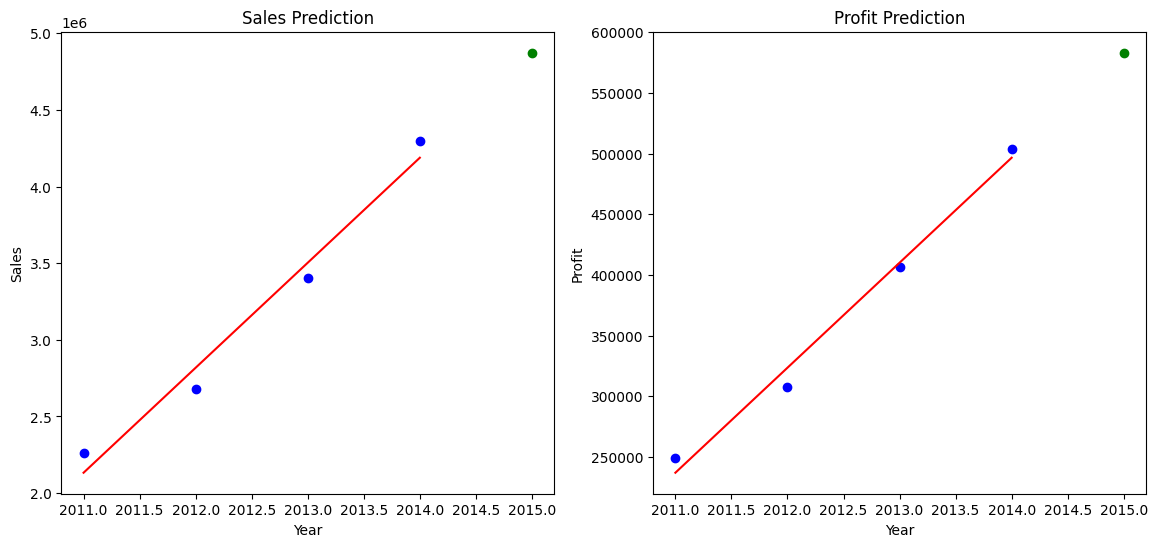

In [ ]:
plt.figure(figsize=(14, 6))

# Sales
plt.subplot(1, 2, 1)
plt.scatter(X, y_sales, color='blue')  # Actual data
plt.plot(X, model_sales.predict(X), color='red')  # Regression line
plt.scatter(next_year, predicted_sales, color='green')  # Predicted data point
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Prediction')

# Profit
plt.subplot(1, 2, 2)
plt.scatter(X, y_profit, color='blue')
plt.plot(X, model_profit.predict(X), color='red')
plt.scatter(next_year, predicted_profit, color='green')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Profit Prediction')

plt.show()